In [1]:
# from deep_ensemble_keras import create_model
import os,sys
import json
import ember
import csv
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn import preprocessing
# import tensorflow as tf
# from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, Dropout
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from keras.models import load_model
from tensorflow import keras
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt



%matplotlib inline

from collections import OrderedDict
from reliability_diagrams import *

Using TensorFlow backend.


In [2]:
def create_model(dim_input = 2381, dim_output = 2, lr = 0.01):
#     print("Building neural network")
    model = Sequential()
    model.add(Dense(70, input_shape=(dim_input,), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(70, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(dim_output, activation='softmax'))

#     print("Compiling neural network")
    # compile the model
    opt = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def extract_data(nomalization = True):
    data_dir_jan = 'ember_2017_2_01'

    data_dir_feb = 'ember_2017_2_02'

    data_dir_mar = 'ember_2017_2_03'


    X_train_jan, y_train_jan = ember.read_vectorized_features(data_dir_jan, subset = 'train', feature_version=2)

    X_train_feb, y_train_feb = ember.read_vectorized_features(data_dir_feb, subset = 'train', feature_version=2)

    X_test, y_test = ember.read_vectorized_features(data_dir_mar,  subset = 'train', feature_version=2)

    X_train = np.concatenate((X_train_jan,X_train_feb), axis = 0)

    y_train = np.concatenate((y_train_jan,y_train_feb), axis = 0)

    train_rows = (y_train != -1)

    test_rows = (y_test != -1)
    
    if nomalization:
        X_train = preprocessing.normalize(X_train[train_rows], norm='l2', axis = 0)
    else:
        X_train = X_train[train_rows]
        
    y_train = y_train[train_rows]
    
    if nomalization:
        X_test = preprocessing.normalize(X_test[test_rows], norm='l2', axis = 0)
    else:
        X_test = X_test[test_rows]
        
    y_test = y_test[test_rows]

    return X_train, y_train, X_test, y_test

def accuracy(y_hat, y):
    pred = np.argmax(y_hat, 1)
    return (pred == y).mean()

def get_result(y_hat):
    return np.argmax(y_hat, 1)

In [3]:
# def draw_reliability_diagram(models_result, name, n_bins=5):
#     """ A method to draw reliability diagrams for multiple models


#     Parameters:
#     ----------
#     * models_result: dict
#         a dictionary where key is model name and value is a tuple of the form (predicted, target)
#     * name: str
#         name of the file to be saved
#     * n_bins: int optional
#         number of bins to draw reliability diagram

#     """
#     for key in models_result:
#         pred = models_result[key][0]
#         target = models_result[key][1]

#         fraction_of_positives, mean_predicted_value = calibration_curve(target, pred, n_bins=n_bins)
#         plt.plot(mean_predicted_value, fraction_of_positives, "s-", label=key)
#         plt.ylabel("Fraction of positives")
#         plt.ylim([-0.05, 1.05])
#         plt.xlim([-0.05, 1.05])
#         plt.legend(loc="lower right")
#         plt.title('Calibration plots  (reliability curve)')

#         if not os.path.exists('plots'):
#             os.makedirs('plots')

#         plt.savefig(os.path.join('plots' , f'{name,key}.png'))
#         plt.close()

In [4]:
X_train, y_train, X_test, y_test = extract_data()

In [5]:
data_dir_2017 = 'new_ember_2017_2'

data_dir_2018 = 'new_ember2018'

X_test_2017, y_test_2017 = ember.read_vectorized_features(data_dir_2017, subset = 'test', feature_version=2)

X_test_2018, y_test_2018 = ember.read_vectorized_features(data_dir_2018, subset = 'test', feature_version=2)


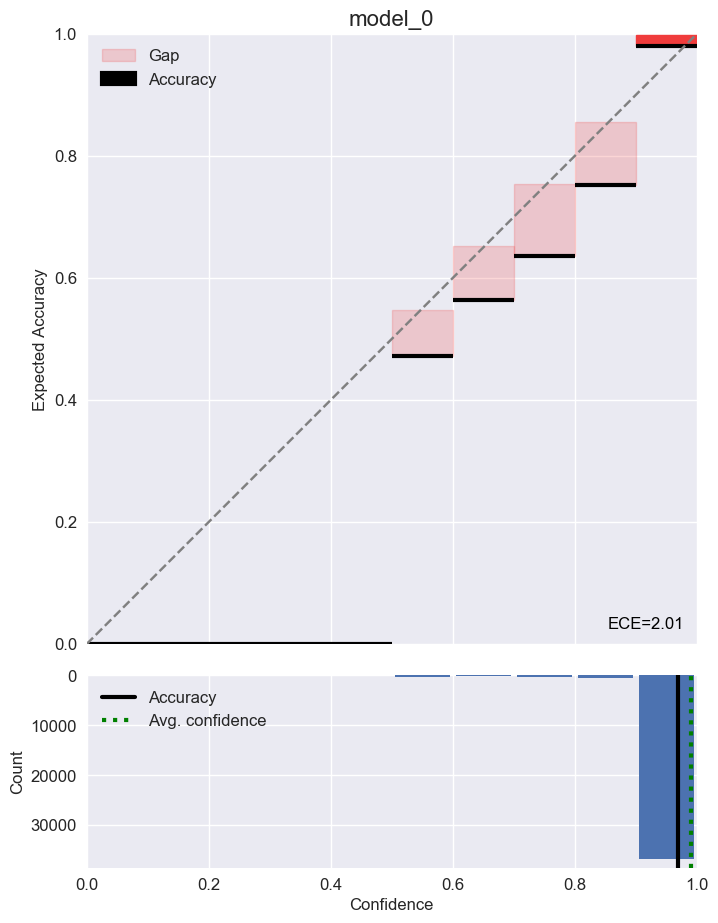

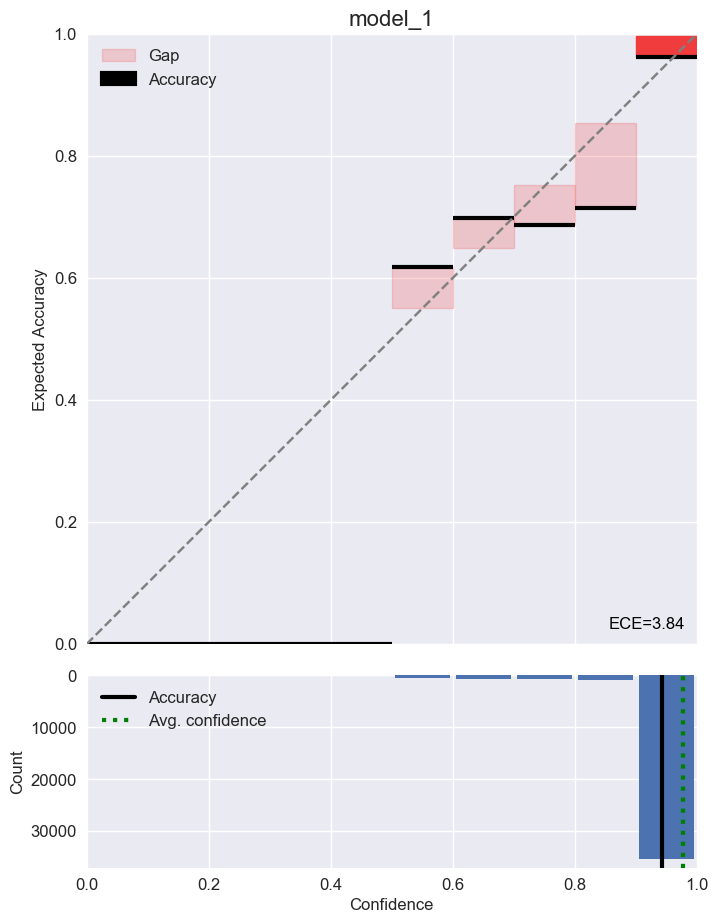

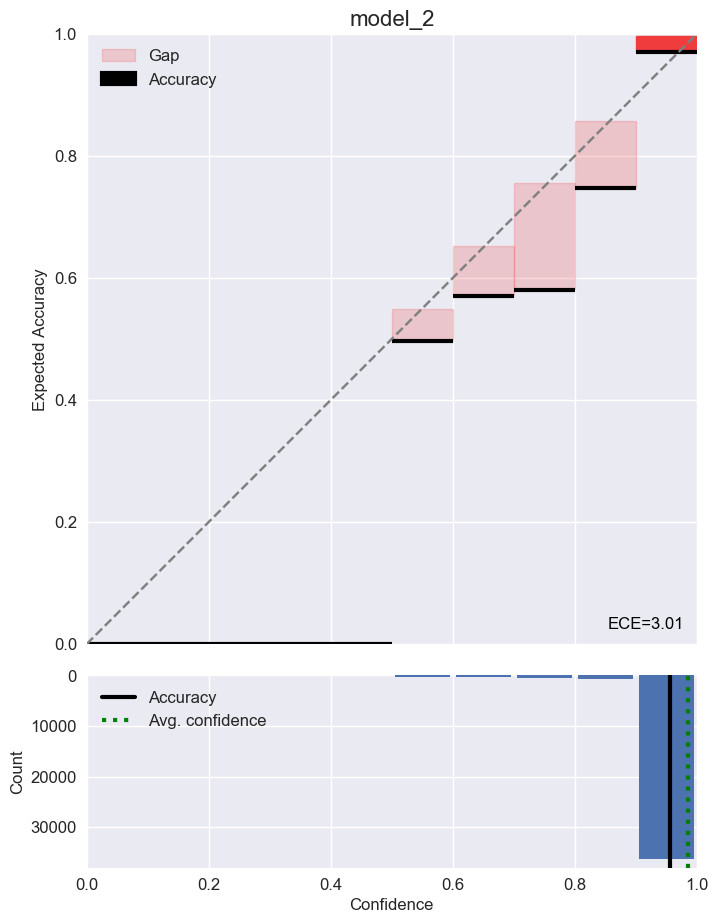

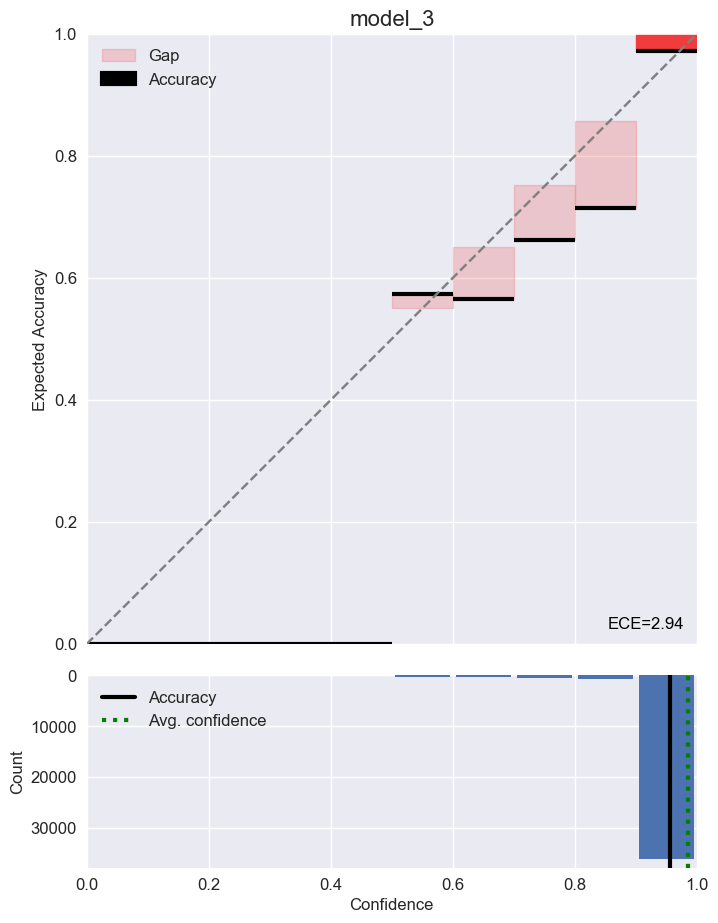

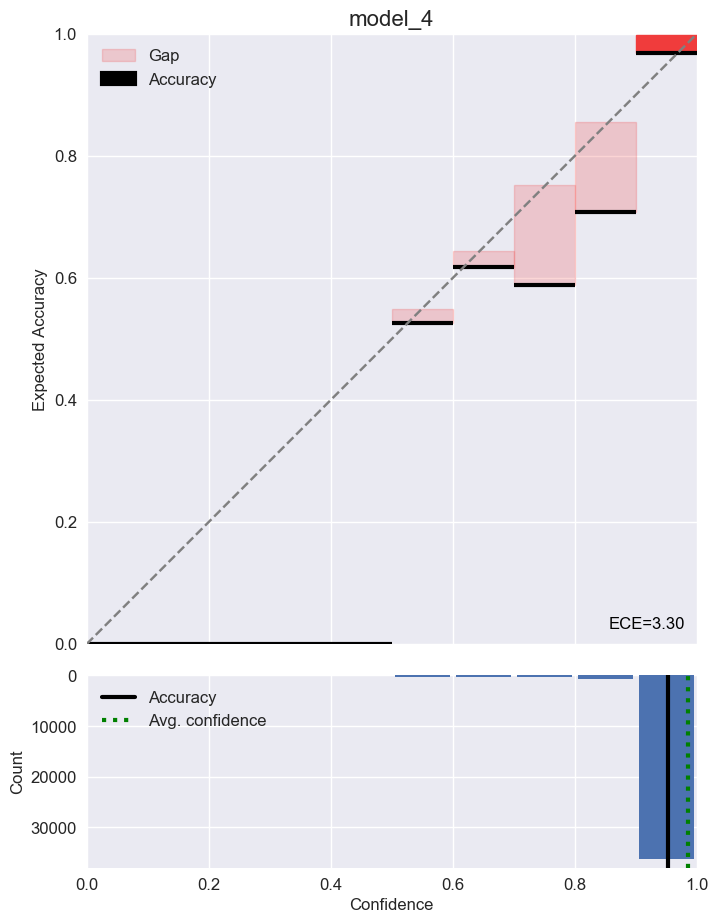

In [7]:
# dic = {}



for i in range(5):

    model = create_model()

    model.load_weights("models_keras/model_{}.h5".format(i))

    prediction = get_result(model.predict(X_test))

    pred_prob = np.max(model.predict(X_test),1)

#     prd_prb_ls = []
#     for index,row in enumerate(model.predict(X_test)):
#             prd_prb_ls.append(row[int(y_test[index])])
            
#     print(prd_prb_ls)
#     print(pred_prob)

    plt.style.use("seaborn")

    plt.rc("font", size=12)
    plt.rc("axes", labelsize=12)
    plt.rc("xtick", labelsize=12)
    plt.rc("ytick", labelsize=12)
    plt.rc("legend", fontsize=12)

    plt.rc("axes", titlesize=16)
    plt.rc("figure", titlesize=16)

    
    fig = reliability_diagram(y_test, prediction, pred_prob, num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                            title="model_{}".format(i), 
                          figsize=(7, 7), dpi=100, 
                          return_fig=True)
    
    fig.savefig('models_keras/plots/model_{}'.format(i))
    
    
#     title = "\n".join(plot_name.split())

# fig = reliability_diagram(y_test, prediction, pred_prob, num_bins=10, draw_ece=True,
#                           draw_bin_importance="alpha", draw_averages=True,
# #                               title=title, 
#                           figsize=(6, 6), dpi=100, 
#                           return_fig=True)
    
#     dic["model_number-{}".format(i)] = (pred_prob, y_test)

#     print(torch.argmax(model.predict(X_test), dim=1))


In [6]:
# bin_data = compute_calibration(y_test, prediction, pred_prob, num_bins=10)

In [7]:
# reliability_diagram_combined(bin_data, draw_ece, draw_bin_importance,
#                                          draw_averages, title, figsize=figsize, 
#                                          dpi=dpi, return_fig=return_fig)

In [11]:

model = create_model()

model.load_weights("models_keras/model_{}.h5".format(0))

prediction = get_result(model.predict(X_test_2017))

pred_prob = np.max(model.predict(X_test_2017),1)

fig = reliability_diagram(y_test, prediction, pred_prob, num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
#                               title=title, 
                          figsize=(7, 7), dpi=100, 
                          return_fig=True)



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


AssertionError: 

In [12]:
prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [13]:
pred_prob

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)